In [ ]:
pip install tensorflow

In [ ]:
pip install sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from prettytable import PrettyTable

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error

from xgboost import XGBRegressor

import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers

from keras.datasets import imdb
from keras.layers import Dense, Activation, Input
from keras.models import Sequential, Model


2.5.0


# Trim dataset

In [8]:
# import dataset
location = "path/to/kaggle_dataset"
df = pd.read_csv(location)
df.drop('Unnamed: 16', axis=1, inplace=True)
df = df.iloc[:400000, :]
df = df.dropna()
print(df.size)

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


5400496


,year,Manufacture,Model,trim,Body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015.0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015.0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015.0,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [31]:
# get a general idea on numbers of manufacture, model, body, and transmission types
print(len(df['Manufacture'].unique()))
print(len(df['Model'].unique()))
print(len(df['Body'].unique()))
print(len(df['transmission'].unique()))

53
768
86
4


In [9]:
# drop vin, state and other individual info
df2 = df[['year', 'Manufacture', 'Model', 'Body', 'transmission', 'odometer', 'mmr', 'sellingprice']]

manu = df['Manufacture'].unique()
model = df['Model'].unique()
body = df['Body'].unique()
trans = df['transmission'].unique()


# pair string with integers in dictionary
type(manu)
manu_id = {}
for i in range(len(manu)):
  manu_id[manu[i]] = i
print(manu_id)

model_id = {}
for i in range(len(model)):
  model_id[model[i]] = i
print(model_id)

body_id = {}
for i in range(len(body)):
  body_id[body[i]] = i
print(body_id)

trans_id = {}
for i in range(len(trans)):
  trans_id[trans[i]] = i
print(trans_id)

df2 = df2.replace({'Manufacture': manu_id})
df2 = df2.replace({'Model': model_id})
df2 = df2.replace({'Body': body_id})
df2 = df2.replace({'transmission': trans_id})

df2 = df2.astype(float)
# df2 = df2.dropna()

X = df2[['year', 'Manufacture', 'Model', 'Body', 'transmission', 'odometer', 'mmr']]
y = df2[['sellingprice']]
print(X, y)

{'Kia': 0, 'BMW': 1, 'Volvo': 2, 'Nissan': 3, 'Chevrolet': 4, 'Audi': 5, 'Ford': 6, 'Cadillac': 7, 'Acura': 8, 'Lexus': 9, 'Hyundai': 10, 'Buick': 11, 'Infiniti': 12, 'Jeep': 13, 'Mercedes-Benz': 14, 'Mitsubishi': 15, 'Mazda': 16, 'MINI': 17, 'Land Rover': 18, 'Lincoln': 19, 'Jaguar': 20, 'Volkswagen': 21, 'Toyota': 22, 'Subaru': 23, 'Scion': 24, 'Porsche': 25, 'Dodge': 26, 'FIAT': 27, 'Chrysler': 28, 'Ferrari': 29, 'Honda': 30, 'GMC': 31, 'Ram': 32, 'smart': 33, 'Bentley': 34, 'Pontiac': 35, 'Saturn': 36, 'Maserati': 37, 'Mercury': 38, 'HUMMER': 39, 'Saab': 40, 'Suzuki': 41, 'Oldsmobile': 42, 'Rolls-Royce': 43, 'Isuzu': 44, 'Plymouth': 45, 'Tesla': 46, 'Aston Martin': 47, 'Geo': 48, 'Fisker': 49, 'Daewoo': 50, 'Lamborghini': 51}
{'Sorento': 0, '3 Series': 1, 'S60': 2, '6 Series Gran Coupe': 3, 'Altima': 4, 'M5': 5, 'Cruze': 6, 'A4': 7, 'Camaro': 8, 'A6': 9, 'Optima': 10, 'Fusion': 11, 'Q5': 12, '6 Series': 13, 'Impala': 14, '5 Series': 15, 'A3': 16, 'XC70': 17, 'SQ5': 18, 'S5': 19, 'S

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# dict = {'Name': 'Audi 100 Wagon',
#         'Year': 1994, 
#        }
  
# X_test = pd.DataFrame(dict)

print(X_train)

          year  Manufacture  Model  Body  transmission  odometer      mmr
107996  2014.0          1.0   15.0   1.0           0.0    6272.0  48500.0
79867   2012.0         10.0   46.0   1.0           0.0   29720.0  11800.0
324624  2008.0          4.0  256.0   2.0           0.0   24279.0  28900.0
215092  2000.0         12.0  423.0   1.0           0.0  156882.0   1650.0
179208  2014.0          6.0  166.0  21.0           0.0    3429.0  28700.0
...        ...          ...    ...   ...           ...       ...      ...
162937  2007.0          4.0  251.0   1.0           0.0   95204.0   2525.0
118726  2014.0          6.0  169.0  12.0           0.0   13313.0  20400.0
8364    2012.0         21.0  100.0   1.0           0.0   43130.0   9600.0
116490  2007.0         31.0  241.0   0.0           0.0   97731.0   9500.0
46497   2007.0         22.0   90.0   1.0           0.0   99081.0   5825.0

[270024 rows x 7 columns]


# train machine learning model: linear regression, Random Forest

In [15]:
def train_ml_model(x, y, model_type):

    if model_type=='lr':
      model=LinearRegression()
    elif model_type=='rf':
        model=RandomForestRegressor()
    model.fit(X_train_scaled, np.log(y))

    return model


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr = train_ml_model(X_train_scaled, y_train,'lr')
model_rf = train_ml_model(X_train_scaled, y_train,'rf')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


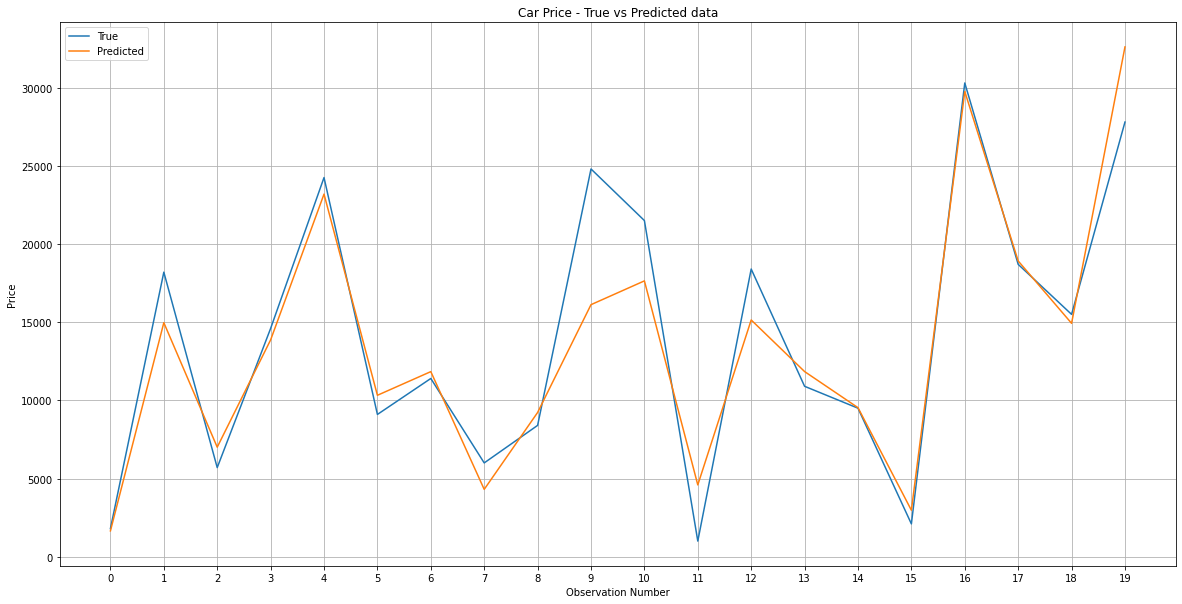

In [18]:
# plot prediction and true price
y_pred=np.exp(model_lr.predict(X_test_scaled))
number_of_observations=20
x_ax = range(len(y_test[:number_of_observations]))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

# train with deep learning dense layers

In [19]:
# small network
model_small=Sequential()

model_small.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
model_small.add(Dense(8, activation='relu'))
model_small.add(Dense(4, activation='relu'))
model_small.add(Dense(1, activation='linear'))

model_small.compile(loss='mean_squared_error',optimizer='adam')
model_small.summary()

epochs=20
batch_size=10

model_small.fit(X_train_scaled, np.log(y_train), verbose=0, validation_data=(X_test_scaled, np.log(y_test)), epochs=epochs, batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


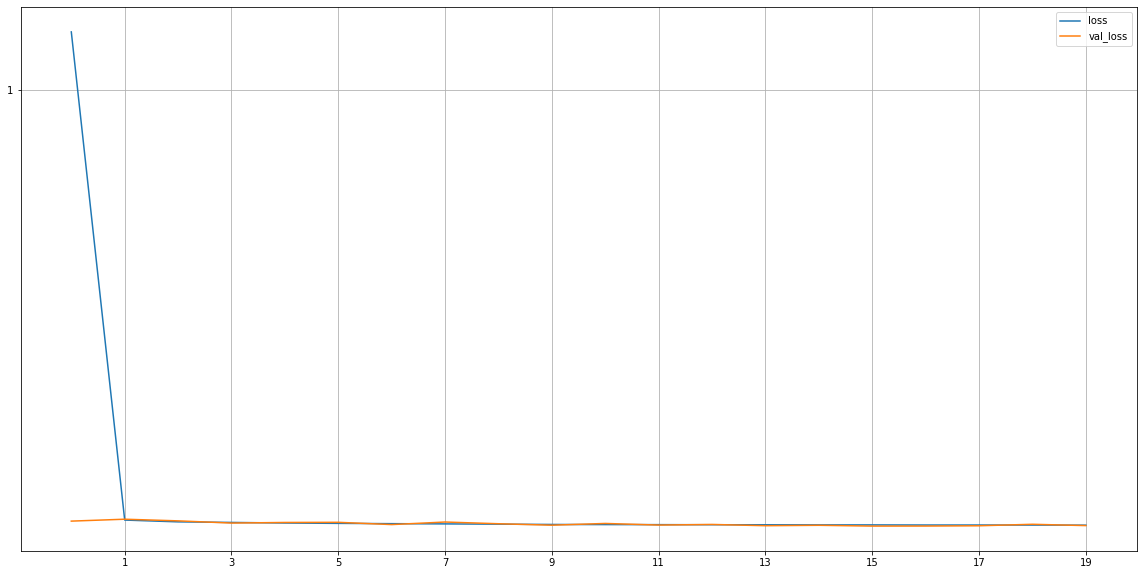

In [22]:
# plot the loss and validation loss

history_df = pd.DataFrame(model_small.history.history)

plt.figure(figsize=(20,10))
plt.plot(history_df['loss'], label='loss')
# plt.plot(history_df['accuracy'], label='accuracy')
plt.plot(history_df['val_loss'], label='val_loss')
# plt.plot(history_df['val_accuracy'], label='val_accuracy')
plt.xticks(np.arange(1,epochs+1,2))
plt.yticks(np.arange(1,max(history_df['loss']),0.5))
plt.legend()
plt.grid()

In [23]:
# large network
model_large=Sequential()

model_large.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_large.add(Dense(32, activation='relu'))
model_large.add(Dense(16, activation='relu'))
model_large.add(Dense(1, activation='linear'))

model_large.compile(loss='mean_squared_error', optimizer='adam')
model_large.summary()

epochs=20
batch_size=10

model_large.fit(X_train_scaled,np.log(y_train),verbose=0,validation_data=(X_test_scaled,np.log(y_test)),epochs=epochs,batch_size=batch_size)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


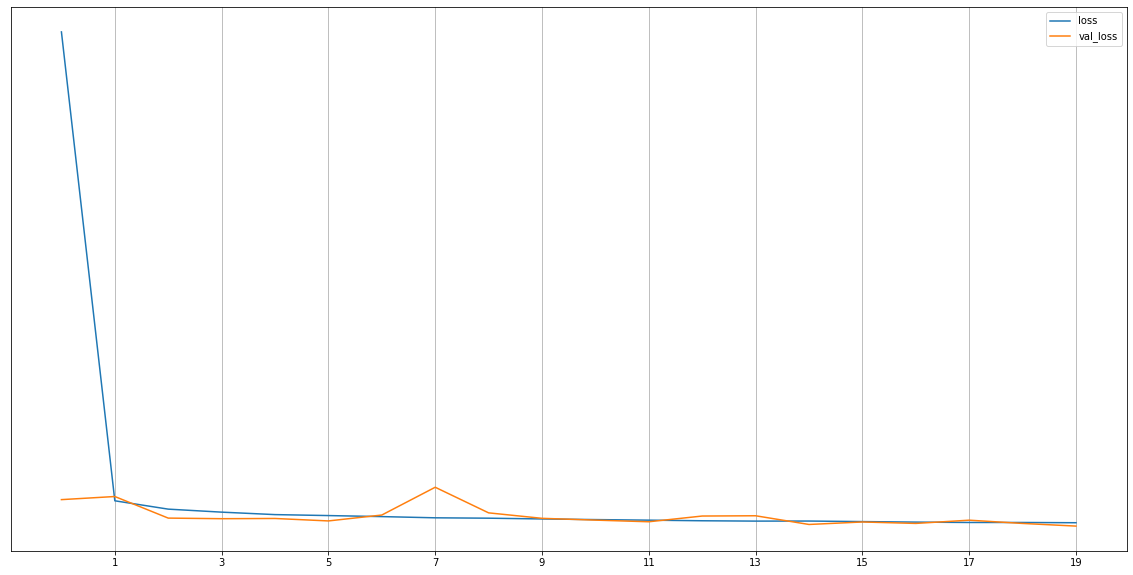

In [25]:
# plot the loss and validation loss

history_df = pd.DataFrame(model_large.history.history)
# print(history_df)

plt.figure(figsize=(20,10))
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.xticks(np.arange(1,epochs+1,2))
plt.yticks(np.arange(1,max(history_df['loss']),0.5))

plt.legend()
plt.grid()

# compare models and plot prediction result

In [26]:
def model_evaluate(model,x,y):

    predictions=model.predict(x)
    predictions=np.exp(predictions)

    mse=mean_squared_error(y,predictions)
    mae=mean_absolute_error(y,predictions)
    # mape=mean_absolute_percentage_error(y,predictions)
    msle=mean_squared_log_error(y,predictions)
    return [mse, mae, msle]


summary=PrettyTable(['Model','MSE','MAE', 'MSLE'])

summary.add_row(['LR'] + model_evaluate(model_lr, X_test_scaled, y_test))
# summary.add_row(['XGB']+model_evaluate(model_xgb,X_test_scaled,y_test))
summary.add_row(['RF']+model_evaluate(model_rf,X_test_scaled,y_test))
summary.add_row(['DL_SMALL']+model_evaluate(model_small,X_test_scaled,y_test))
summary.add_row(['DL_LARGE']+model_evaluate(model_large,X_test_scaled,y_test))

print(summary)

+----------+--------------------+--------------------+----------------------+
|  Model   |        MSE         |        MAE         |         MSLE         |
+----------+--------------------+--------------------+----------------------+
|    LR    | 97010644219.84587  | 6377.957422135788  | 0.15196673478518613  |
|    RF    |  3113973.81295239  | 1154.6229106579026 |  0.0594177446935354  |
| DL_SMALL | 4116746.273595428  | 1280.512896817256  | 0.057763854476672365 |
| DL_LARGE | 4133890.3331958638 | 1122.4068719108745 |  0.0559588695398636  |
+----------+--------------------+--------------------+----------------------+


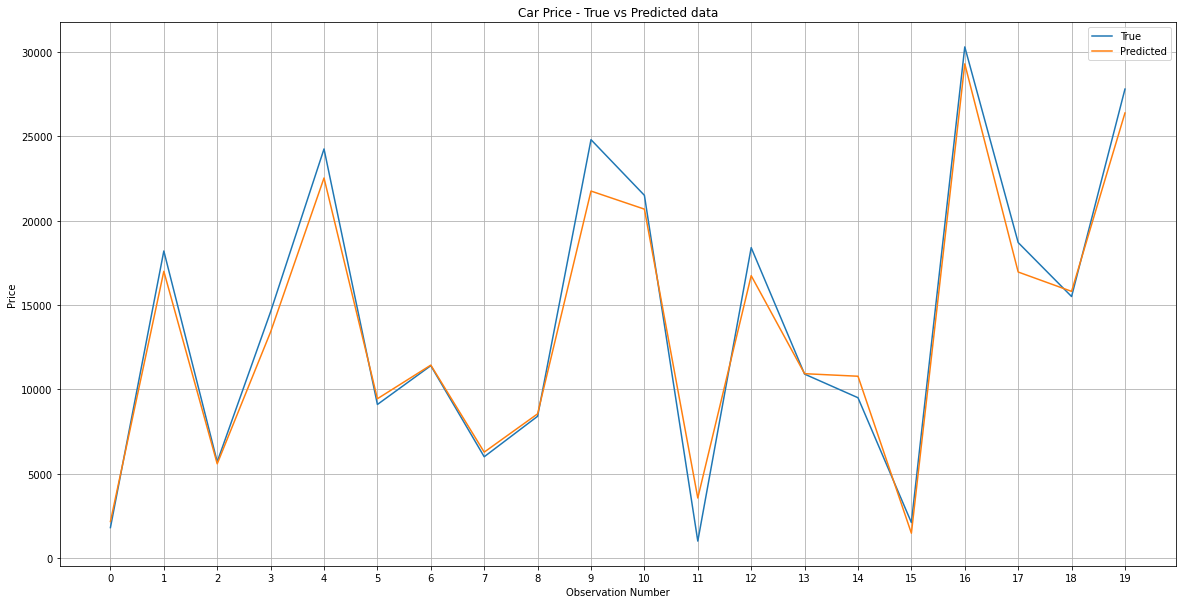

In [27]:
# plot prediction and true price
y_pred=np.exp(model_large.predict(X_test_scaled))
number_of_observations=20
x_ax = range(len(y_test[:number_of_observations]))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test[:number_of_observations], label="True")
plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")
plt.title("Car Price - True vs Predicted data")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

In [28]:
model_large.save('car_price_classification.model')

INFO:tensorflow:Assets written to: car_price_classification.model/assets


# predict mmr and price for cars in the images



In [29]:
# take the output read from car images, to predict the price

location = "/content/gdrive/My Drive/Colab Notebooks/CS523/result_image.csv"
result = pd.read_csv(location)
result.drop('Unnamed: 0', axis=1, inplace=True)

result.head()

,Manufacturer,Model,Body,Year
0,Suzuki,Aerio,Sedan,2007
1,Jeep,Wrangler,SUV,2012
2,Scion,xD,Hatchback,2012
3,Hyundai,Elantra,Sedan,2007
4,Aston,Martin,Convertible,2012


In [32]:
# add new manufacturer and Model name

more_manu = result['Manufacturer'].unique()
more_model = result['Model'].unique()

# pair string with integers in dictionary
type(manu)
for i in range(len(more_manu)):
  if more_manu[i] not in manu_id:
    manu_id[more_manu[i]] = i
print(manu_id)

for i in range(len(more_model)):
  if more_model[i] not in model_id:
    model_id[more_model[i]] = i

print(model_id)

{'Kia': 0, 'BMW': 1, 'Volvo': 2, 'Nissan': 3, 'Chevrolet': 4, 'Audi': 5, 'Ford': 6, 'Cadillac': 7, 'Acura': 8, 'Lexus': 9, 'Hyundai': 10, 'Buick': 11, 'Infiniti': 12, 'Jeep': 13, 'Mercedes-Benz': 14, 'Mitsubishi': 15, 'Mazda': 16, 'MINI': 17, 'Land Rover': 18, 'Lincoln': 19, 'Jaguar': 20, 'Volkswagen': 21, 'Toyota': 22, 'Subaru': 23, 'Scion': 24, 'Porsche': 25, 'Dodge': 26, 'FIAT': 27, 'Chrysler': 28, 'Ferrari': 29, 'Honda': 30, 'GMC': 31, 'Ram': 32, 'smart': 33, 'Bentley': 34, 'Pontiac': 35, 'Saturn': 36, 'Maserati': 37, 'Mercury': 38, 'HUMMER': 39, 'Saab': 40, 'Suzuki': 41, 'Oldsmobile': 42, 'Rolls-Royce': 43, 'Isuzu': 44, 'Plymouth': 45, 'Tesla': 46, 'Aston Martin': 47, 'Geo': 48, 'Fisker': 49, 'Daewoo': 50, 'Lamborghini': 51, 'Aston': 4, 'Maybach': 5}
{'Sorento': 0, '3 Series': 1, 'S60': 2, '6 Series Gran Coupe': 3, 'Altima': 4, 'M5': 5, 'Cruze': 6, 'A4': 7, 'Camaro': 8, 'A6': 9, 'Optima': 10, 'Fusion': 11, 'Q5': 12, '6 Series': 13, 'Impala': 14, '5 Series': 15, 'A3': 16, 'XC70': 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


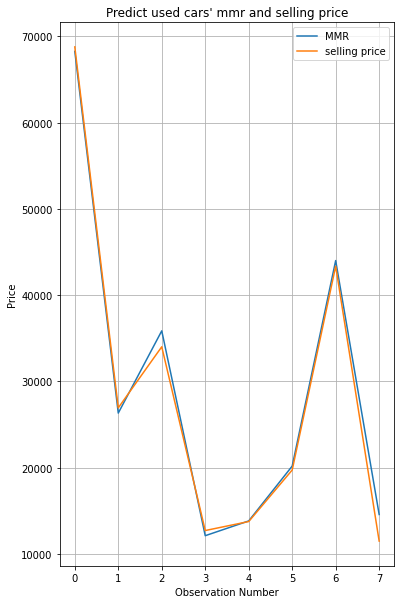

In [36]:
# read the output from image recognition
rt2 = result.copy()
rt2 = rt2.replace({'Manufacturer': manu_id})
rt2 = rt2.replace({'Model': model_id})
rt2 = rt2.replace({'Body': body_id})

# print(rt2)

# predict mmr with large dense model
df3 = df2.iloc[:1000]
mmr_X_train = df3[['year', 'Manufacture', 'Model', 'Body']]
mmr_y_train = df3['mmr']
mmr_X_test = rt2[['Year', 'Manufacturer', 'Model', 'Body']]

scaler = StandardScaler()
mmr_X_train_scaled = scaler.fit_transform(mmr_X_train)
mmr_X_test_scaled = scaler.transform(mmr_X_test)


# deep learning model
def train_ml_model_mmr(x, y, model_type):

    if model_type=='lr':
      model=LinearRegression()
    elif model_type=='rf':
        model=RandomForestRegressor()
    model.fit(mmr_X_train_scaled, np.log(y))

    return model

model_rf = train_ml_model_mmr(mmr_X_train_scaled, mmr_y_train,'rf')

mmr_y_pred = np.exp(model_rf.predict(mmr_X_test_scaled))

# predict selling price 
price_X_train = df2[['year', 'Manufacture', 'Model', 'Body', 'mmr']]
price_y_train = df2['sellingprice']
price_X_test = rt2[['Year', 'Manufacturer', 'Model', 'Body']]
price_X_test['mmr'] = mmr_y_pred

price_X_train_scaled = scaler.fit_transform(price_X_train)
price_X_test_scaled = scaler.transform(price_X_test)

def train_ml_model_price(x, y, model_type):

    if model_type=='lr':
      model=LinearRegression()
    elif model_type=='xgb':
        model=XGBRegressor()
    elif model_type=='rf':
        model=RandomForestRegressor()
    model.fit(price_X_train_scaled, np.log(y))

    return model

model_rf = train_ml_model_price(price_X_train_scaled, price_y_train,'rf')

price_y_pred = np.exp(model_rf.predict(price_X_test_scaled))


# plot price
# price_y_pred = np.exp(model_large.predict(price_X_test_scaled))
number_of_observations = 8
x_ax = range(len(mmr_y_pred[:number_of_observations]))
plt.figure(figsize=(6,10))
# plt.plot(x_ax, mmr_y_pred[:number_of_observations], label="True")
plt.plot(x_ax, mmr_y_pred[:number_of_observations], label="MMR")
plt.plot(x_ax, price_y_pred[:number_of_observations], label="selling price")

plt.title("Predict used cars' mmr and selling price")
plt.xlabel('Observation Number')
plt.ylabel('Price')
plt.xticks(np.arange(number_of_observations))
plt.legend()
plt.grid()
plt.show()

In [42]:
# save results (price) to csv
result['price'] = price_y_pred
print(result)
result.to_csv('result_price.csv')


  Manufacturer      Model         Body  Year         price
0       Suzuki      Aerio        Sedan  2007  68790.530772
1         Jeep   Wrangler          SUV  2012  26943.547871
2        Scion         xD    Hatchback  2012  34024.202008
3      Hyundai    Elantra        Sedan  2007  12720.547386
4        Aston     Martin  Convertible  2012  13762.689741
5      Maybach  Landaulet  Convertible  2012  19736.246590
6     Chrysler  Crossfire  Convertible  2008  43368.718800
7    Chevrolet    Express          Van  2007  11496.756236
8         Audi         S4        Sedan  2007  33788.445543


In [43]:
!cp result_price.csv "/content/gdrive/My Drive/Colab Notebooks/CS523/"